In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

In [18]:
with open('sum.json') as f:
    all_runs = json.load(f)

with open('../T_O2ULFM/stats.json') as f2:
    new_run = json.load(f2)
    
flags = list(all_runs.keys())

In [19]:
react_avg = []
dens_avg = []
vel_avg = []
total_avg = []
react_time_avg = []
dens_time_avg = []
vel_time_avg = []
total_time_avg = []

for flag in flags:
    react_Runtime = np.zeros_like(all_runs[flag]['res'])
    dens_Runtime = np.zeros_like(all_runs[flag]['res'])
    vel_Runtime = np.zeros_like(all_runs[flag]['res'])
    total_Runtime = np.zeros_like(all_runs[flag]['res'])
    react_Mflops = np.zeros_like(all_runs[flag]['res'])
    dens_Mflops = np.zeros_like(all_runs[flag]['res'])
    vel_Mflops = np.zeros_like(all_runs[flag]['res'])
    total_Mflops = np.zeros_like(all_runs[flag]['res'])
    i = 0
    for run in all_runs[flag]['res']:
        react_Runtime[i] = np.float32(run['REACT']['Runtime (RDTSC) [s]'])
        dens_Runtime[i] = np.float32(run['DENS']['Runtime (RDTSC) [s]'])
        vel_Runtime[i] = np.float32(run['VEL']['Runtime (RDTSC) [s]'])
        total_Runtime[i] = np.float32(run['TOTAL']['Runtime (RDTSC) [s]'])
        react_Mflops[i] = np.float32(run['REACT']['SP [MFLOP/s]'])
        dens_Mflops[i] = np.float32(run['DENS']['SP [MFLOP/s]'])
        vel_Mflops[i] = np.float32(run['VEL']['SP [MFLOP/s]'])
        total_Mflops[i] = np.float32(run['TOTAL']['SP [MFLOP/s]'])
        i +=1
    react_time_avg.append([np.average(react_Runtime), np.std(react_Runtime)])
    dens_time_avg.append([np.average(dens_Runtime), np.std(dens_Runtime)])
    vel_time_avg.append([np.average(vel_Runtime), np.std(vel_Runtime)])
    total_time_avg.append([np.average(total_Runtime), np.std(total_Runtime)])
    react_avg.append([np.average(react_Mflops), np.std(react_Mflops)])
    dens_avg.append([np.average(dens_Mflops), np.std(dens_Mflops)])
    vel_avg.append([np.average(vel_Mflops), np.std(vel_Mflops)])
    total_avg.append([np.average(total_Mflops), np.std(total_Mflops)])
    
react_Runtime = np.zeros_like(new_run['res'])
dens_Runtime = np.zeros_like(new_run['res'])
vel_Runtime = np.zeros_like(new_run['res'])
total_Runtime = np.zeros_like(new_run['res'])
react_Mflops = np.zeros_like(new_run['res'])
dens_Mflops = np.zeros_like(new_run['res'])
vel_Mflops = np.zeros_like(new_run['res'])
total_Mflops = np.zeros_like(new_run['res'])
i = 0
for run in new_run['res']:
    react_Runtime[i] = np.float32(run['REACT']['Runtime (RDTSC) [s]'])
    dens_Runtime[i] = np.float32(run['DENS']['Runtime (RDTSC) [s]'])
    vel_Runtime[i] = np.float32(run['VEL']['Runtime (RDTSC) [s]'])
    total_Runtime[i] = np.float32(run['TOTAL']['Runtime (RDTSC) [s]'])
    react_Mflops[i] = np.float32(run['REACT']['SP [MFLOP/s]'])
    dens_Mflops[i] = np.float32(run['DENS']['SP [MFLOP/s]'])
    vel_Mflops[i] = np.float32(run['VEL']['SP [MFLOP/s]'])
    total_Mflops[i] = np.float32(run['TOTAL']['SP [MFLOP/s]'])
    i +=1

react_time_avg.append([np.average(react_Runtime), np.std(react_Runtime)])
dens_time_avg.append([np.average(dens_Runtime), np.std(dens_Runtime)])
vel_time_avg.append([np.average(vel_Runtime), np.std(vel_Runtime)])
total_time_avg.append([np.average(total_Runtime), np.std(total_Runtime)])
react_avg.append([np.average(react_Mflops), np.std(react_Mflops)])
dens_avg.append([np.average(dens_Mflops), np.std(dens_Mflops)])
vel_avg.append([np.average(vel_Mflops), np.std(vel_Mflops)])
total_avg.append([np.average(total_Mflops), np.std(total_Mflops)])
flags.append('NEW')

react_time_avg = np.array(react_time_avg)
dens_time_avg = np.array(dens_time_avg)
vel_time_avg = np.array(vel_time_avg)
total_time_avg = np.array(total_time_avg)
react_avg = np.array(react_avg)
dens_avg = np.array(dens_avg)
vel_avg = np.array(vel_avg)
total_avg = np.array(total_avg)

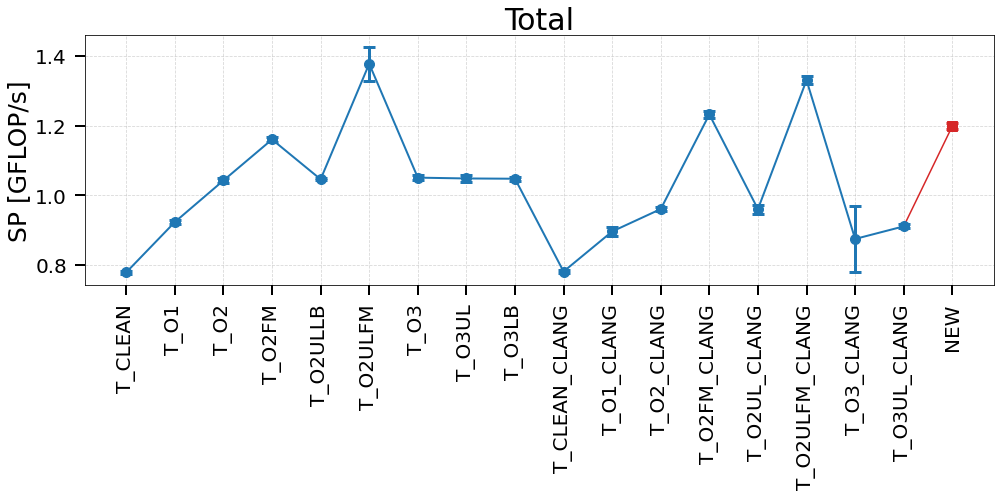

In [20]:
ms = 10
elw = 3
cs = 6
ct = 3

fig, ax1 = plt.subplots(figsize=(14, 7))
x_array = np.arange(1, np.size(total_avg[:, 0]) + 1)

ax1.set_title('Total', fontsize=30)
ax1.set_ylabel('SP [GFLOP/s]', fontsize=25)
ax1.set_xticks(ticks=x_array)
ax1.tick_params(axis='both', labelsize=20)
ax1.tick_params(axis='both', which='major', length=10, width=2, pad=8)
ax1.set_xticklabels(flags, rotation=90)

total_avg_vec = total_avg[:, 0]
total_std_vec = total_avg[:, 1]
ax1.errorbar(x_array[:-1], total_avg_vec[:-1] * 1e-3, total_std_vec[:-1] * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Total', color='tab:blue')
ax1.plot(x_array[-2:], total_avg_vec[-2:] * 1e-3, color='tab:red')
ax1.errorbar(x_array[-1], total_avg_vec[-1] * 1e-3, total_std_vec[-1] * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Total', color='tab:red')

ax1.grid(ls='--', alpha=0.5)
#ax1.legend(fontsize=22)

plt.tight_layout()
fig.savefig("total.pdf")
fig.savefig("total.jpg")

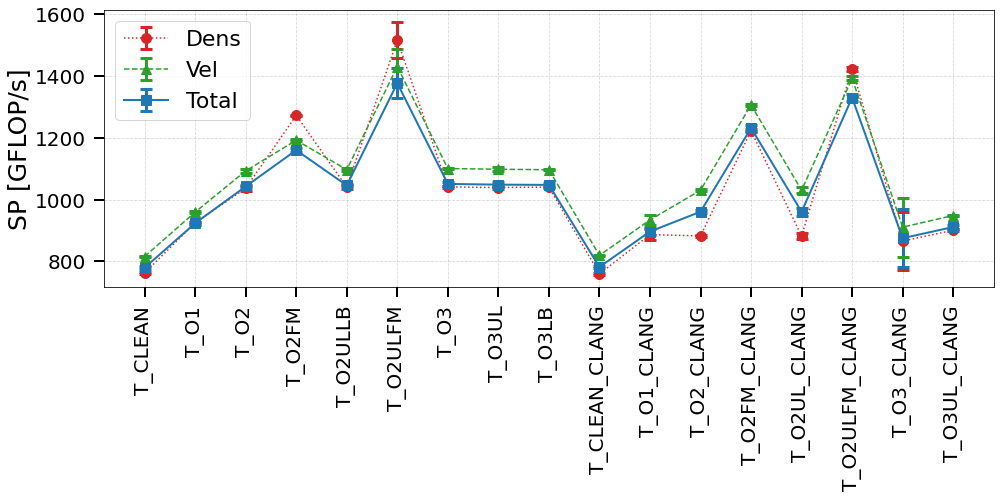

In [88]:
fig, ax1 = plt.subplots(figsize=(14, 7))
x_array = np.arange(1, np.size(total_avg[:, 0]) + 1,1)

ax1.set_ylabel('SP [GFLOP/s]', fontsize=25)
ax1.set_xticks(ticks=x_array)
ax1.tick_params(axis='both', labelsize=20)
ax1.tick_params(axis='both', which='major', length=10, width=2, pad=8)
ax1.set_xticklabels(flags, rotation=90)

ax1.errorbar(x_array, dens_avg[:, 0], dens_avg[:, 1], marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Dens', color='tab:red', ls=':')
ax1.errorbar(x_array, vel_avg[:, 0], dens_avg[:, 1], marker='^', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Vel', color='tab:green', ls='--')
ax1.errorbar(x_array, total_avg[:, 0], total_avg[:, 1], lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Total', color='tab:blue')

ax1.grid(ls='--', alpha=0.5)
ax1.legend(fontsize=22)

plt.tight_layout()
fig.savefig("disc.pdf")
fig.savefig("disc.jpg")

In [91]:
total_time_avg

array([[1.50160003, 0.00882474],
       [1.27452493, 0.00646296],
       [1.11927998, 0.00632192],
       [1.01167512, 0.00602286],
       [1.11560023, 0.00338083],
       [0.85357493, 0.0349632 ],
       [1.11056507, 0.0069314 ],
       [1.1130898 , 0.00971617],
       [1.11385989, 0.00655938],
       [1.49712002, 0.00824989],
       [1.2904948 , 0.01764235],
       [1.13365483, 0.00642771],
       [0.88014996, 0.00735456],
       [1.13411999, 0.01567953],
       [0.81511003, 0.0067193 ],
       [1.34342504, 0.20140249],
       [1.26956499, 0.00845894]])

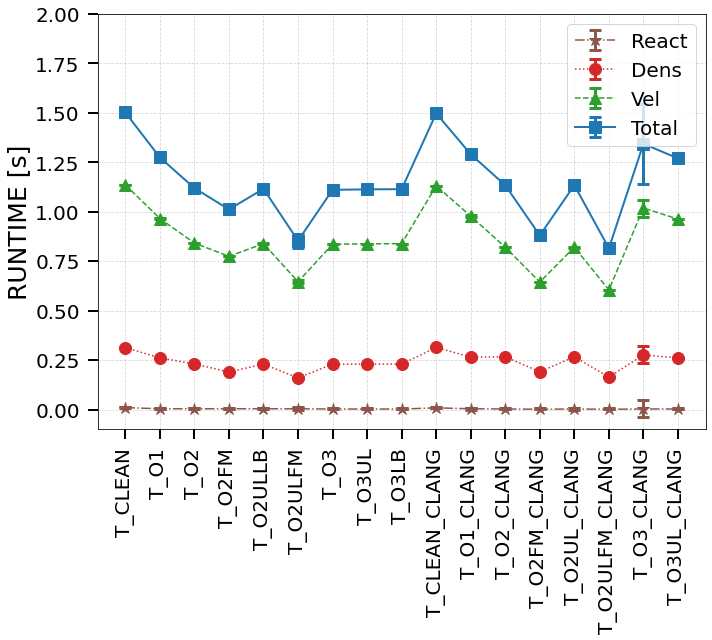

In [93]:
ms = 12
elw = 3
cs = 6
ct = 3

fig, ax1 = plt.subplots(figsize=(10, 9))
x_array = np.arange(1, np.size(total_avg[:, 0]) + 1,1)

ax1.set_ylabel('RUNTIME [s]', fontsize=25)
ax1.set_ylim([-0.1, 2.])
ax1.set_xticks(ticks=x_array)
ax1.tick_params(axis='both', labelsize=20)
ax1.tick_params(axis='both', which='major', length=10, width=2, pad=8)
ax1.set_xticklabels(flags, rotation=90)

ax1.errorbar(x_array, react_time_avg[:, 0], dens_time_avg[:, 1], marker='*', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='React', color='tab:brown', ls='-.')
ax1.errorbar(x_array, dens_time_avg[:, 0], dens_time_avg[:, 1], marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Dens', color='tab:red', ls=':')
ax1.errorbar(x_array, vel_time_avg[:, 0], dens_time_avg[:, 1], marker='^', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Vel', color='tab:green', ls='--')
ax1.errorbar(x_array, total_time_avg[:, 0], total_time_avg[:, 1], lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Total', color='tab:blue')

ax1.grid(ls='--', alpha=0.5)
ax1.legend(fontsize=20, loc='best')

plt.tight_layout()
fig.savefig("runtime.pdf")
fig.savefig("runtime.jpg")